In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [2]:
# loading the dataset
df = pd.read_csv("Sales.csv")

In [3]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical variables
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB
None
            Rating  Selling Price  Original Price      Discount  \
count  2970.000000    3114.000000     3114.000000   3114.

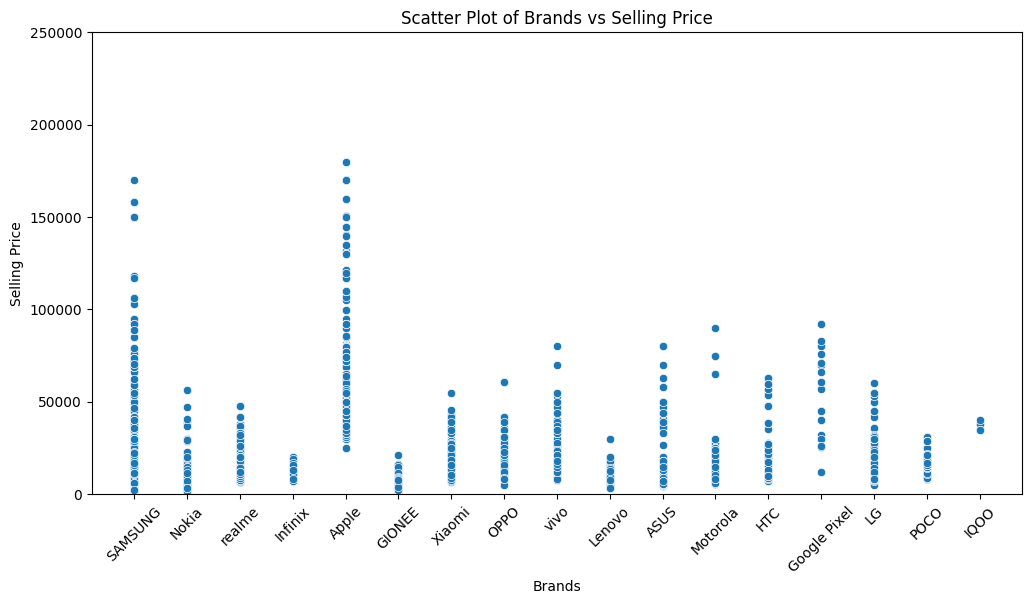

In [6]:
# Set the figure size to make room for longer x-axis labels
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(x='Brands', y='Selling Price', data = df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the y-axis limit to ensure all data points are visible
plt.ylim(0, 250000)

# Add title and labels
plt.title('Scatter Plot of Brands vs Selling Price')
plt.xlabel('Brands')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

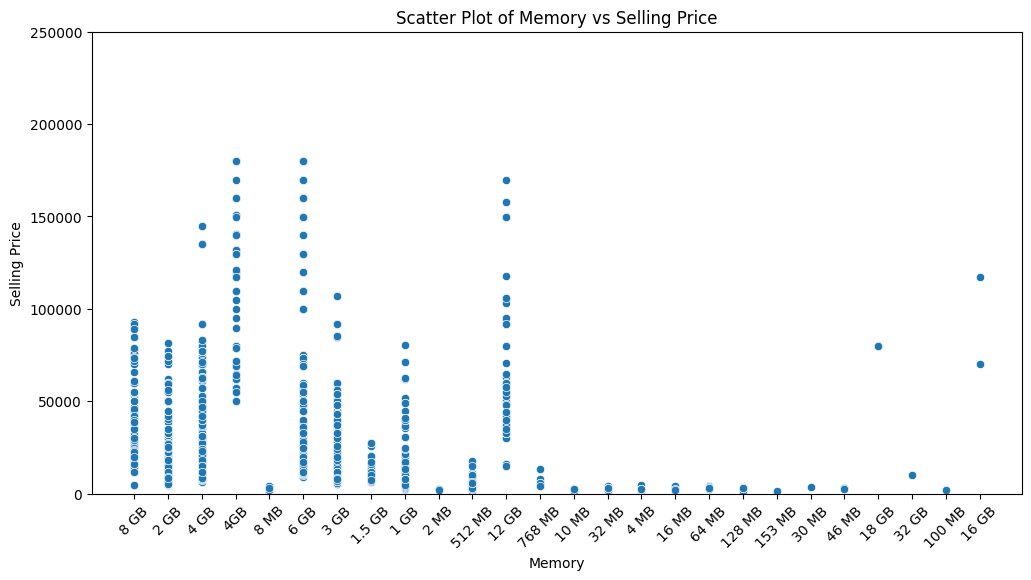

In [13]:
# Set the figure size to make room for longer x-axis labels
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(x='Memory', y='Selling Price', data = df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the y-axis limit to ensure all data points are visible
plt.ylim(0, 250000)

# Add title and labels
plt.title('Scatter Plot of Memory vs Selling Price')
plt.xlabel('Memory')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

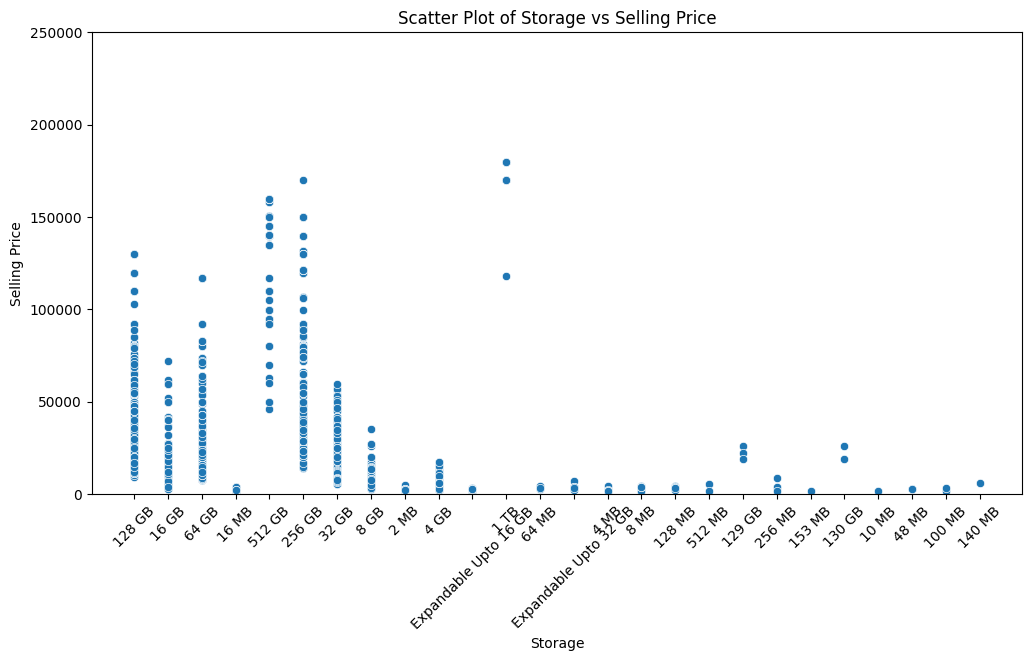

In [14]:
# Set the figure size to make room for longer x-axis labels
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(x='Storage', y='Selling Price', data = df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the y-axis limit to ensure all data points are visible
plt.ylim(0, 250000)

# Add title and labels
plt.title('Scatter Plot of Storage vs Selling Price')
plt.xlabel('Storage')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

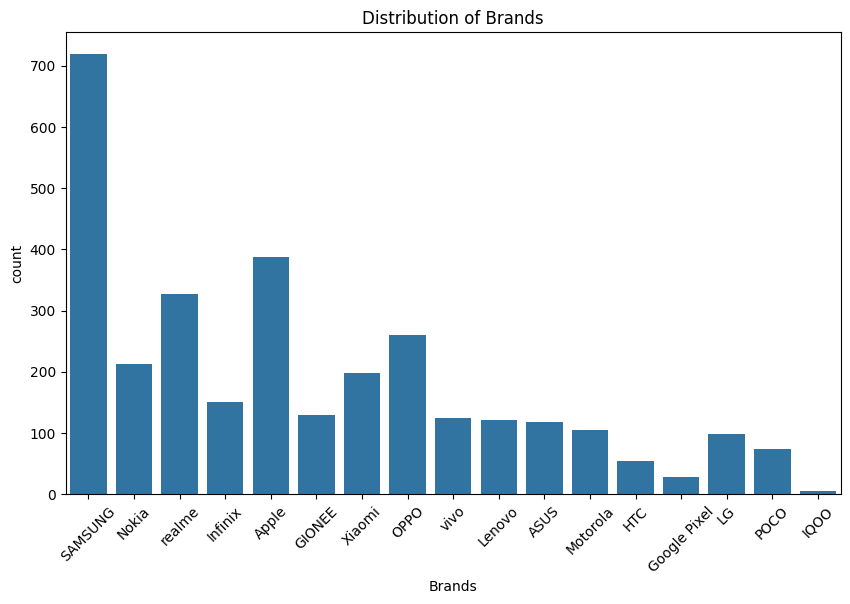

In [8]:
# Count plot for 'Brands'
plt.figure(figsize=(10, 6))
sns.countplot(x='Brands', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Brands')
plt.show()

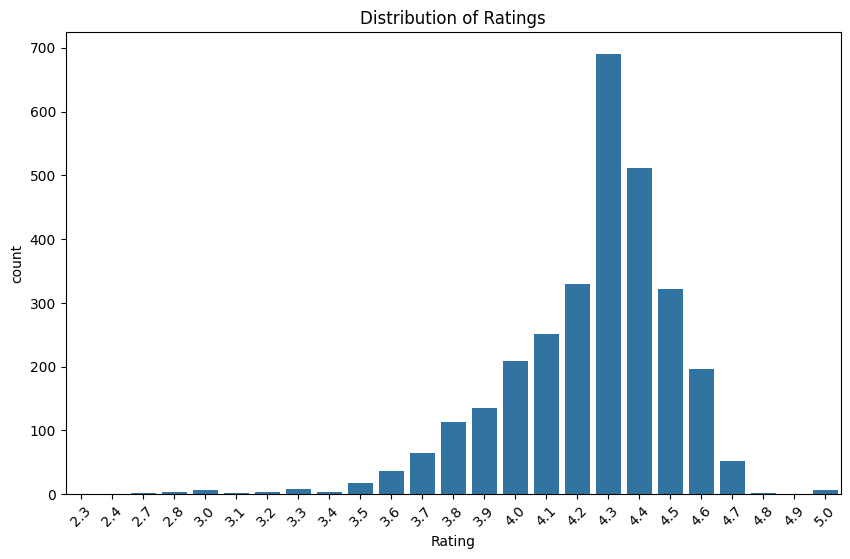

In [11]:
# Count plot for 'Brands'
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.show()

In [18]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
# For numerical columns, fill missing values with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill missing values with mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Missing Values:
Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [19]:
# Step 3: Descriptive statistics for numerical columns
print("\n Descriptive Statistics for Numerical Columns:")
print(df.describe())


 Descriptive Statistics for Numerical Columns:
            Rating  Selling Price  Original Price      Discount  \
count  3114.000000    3114.000000     3114.000000   3114.000000   
mean      4.243098   26436.625562    28333.473025   1896.847463   
std       0.265625   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  
count          3114.000000  
mean              6.086788  
std              11.106776  
min            -160.320641  
25%               0.000000  
50%               0.000000  
75%               9.836388  
max              70.610305  


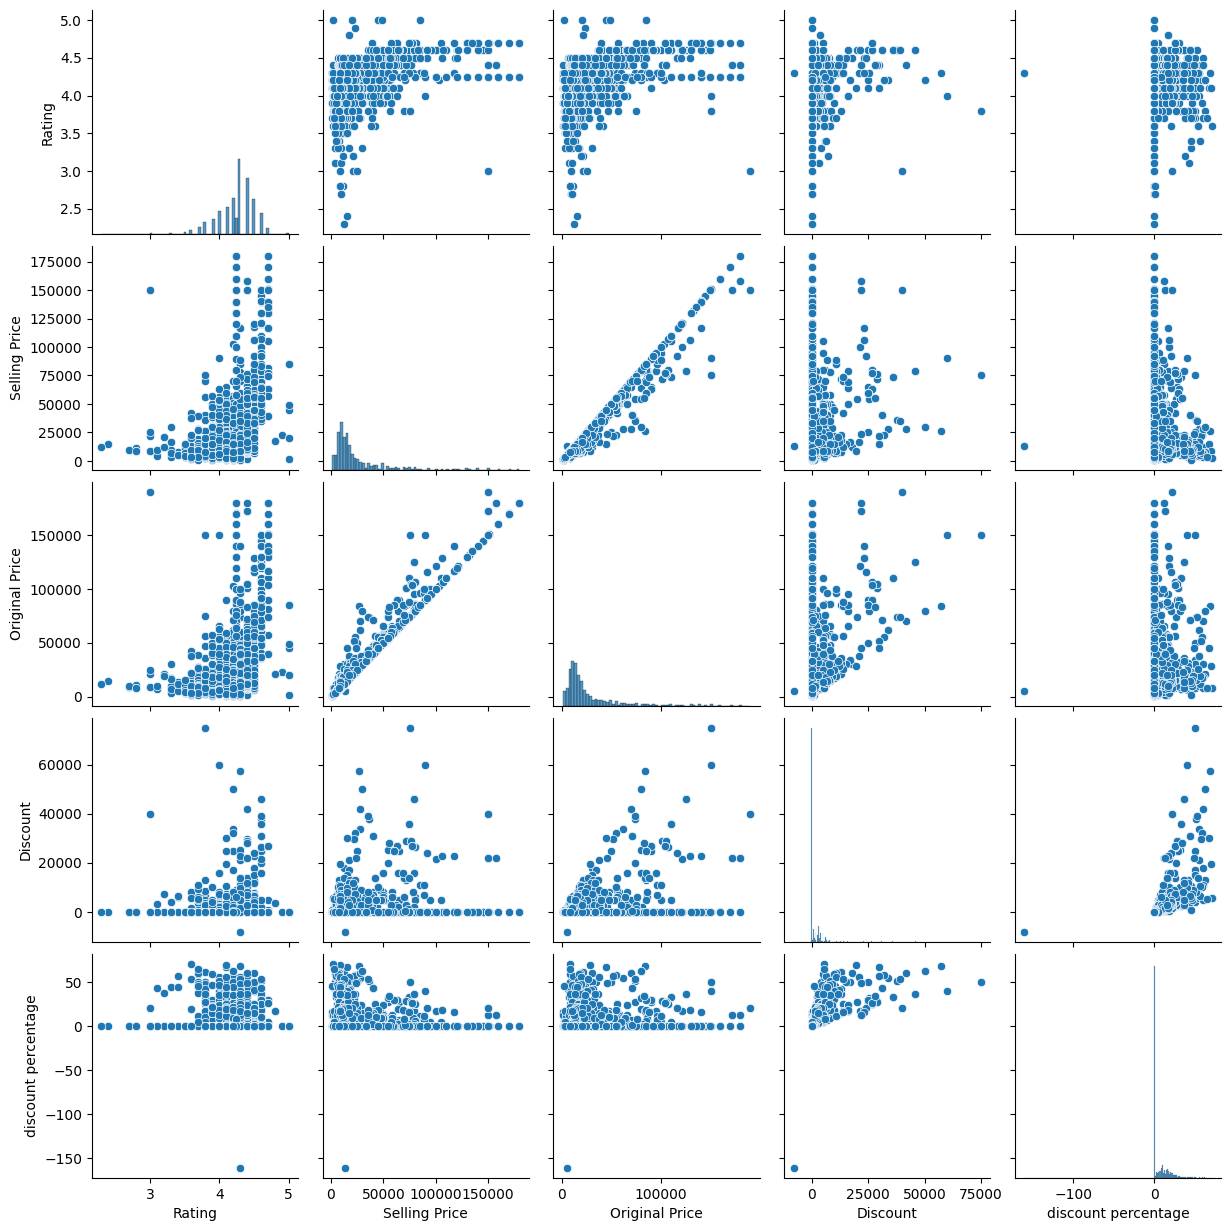

<ipython-input-20-a15ec268f8c4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


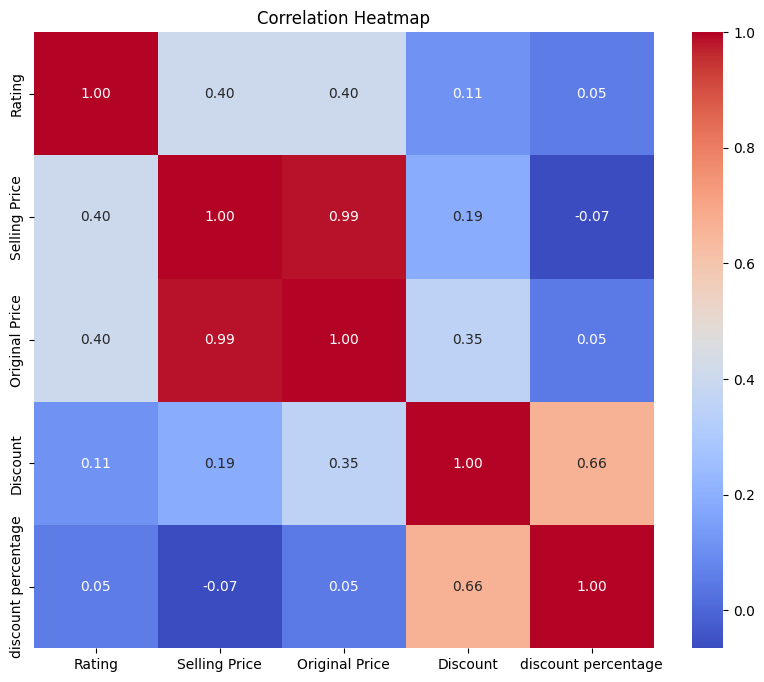

In [20]:
# Step 4: Explore distributions and relationships
# Pairplot for numerical columns
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Step 5: Encode categorical variables
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols)

# Display updated dataframe
print("\n Updated DataFrame with Encoded Categorical Variables:")
print(df.head())


 Updated DataFrame with Encoded Categorical Variables:
   Rating  Selling Price  Original Price  Discount  discount percentage  \
0     4.3          19330           20999      1669             7.947998   
1     3.8          10199           10199         0             0.000000   
2     4.4           6999            7999      1000            12.501563   
3     4.2          12999           12999         0             0.000000   
4     4.6          49900           49900         0             0.000000   

   Brands_ASUS  Brands_Apple  Brands_GIONEE  Brands_Google Pixel  Brands_HTC  \
0            0             0              0                    0           0   
1            0             0              0                    0           0   
2            0             0              0                    0           0   
3            0             0              0                    0           0   
4            0             1              0                    0           0   

   ...  Mobi

In [22]:
#Regression Analysis

# Step 1: Split data into features (X) and target variable (y)
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Interpret the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n Coefficients:")
print(coefficients)

Mean Squared Error: 1.2822768629458008e-20
R-squared: 1.0

 Coefficients:
                  Feature   Coefficient
0                  Rating  3.265810e-11
1          Original Price  1.000000e+00
2                Discount -1.000000e+00
3     discount percentage -1.974350e-12
4             Brands_ASUS  4.689514e-11
...                   ...           ...
2550      Mobile_vivo Y93  3.935886e-12
2551      Mobile_vivo Y94  3.730137e-12
2552      Mobile_vivo Y95 -6.277084e-12
2553   Mobile_vivo Z1 Pro -4.185426e-11
2554      Mobile_vivo Z1x -1.465048e-11

[2555 rows x 2 columns]


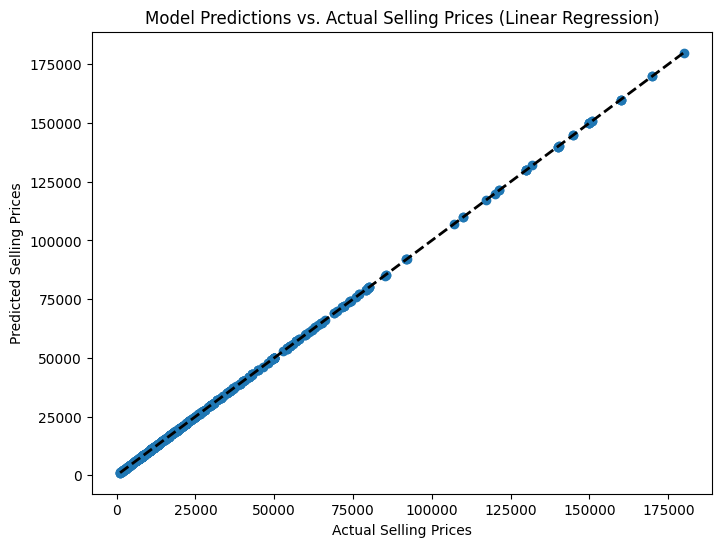

In [24]:
# Visualize model predictions vs. actual selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Model Predictions vs. Actual Selling Prices (Linear Regression)")
plt.show()